In [354]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

Reading the original image

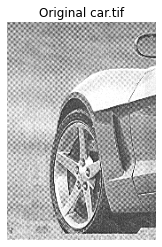

In [355]:
I = cv2.imread('Car.tif', 0)
plt.imshow(I, cmap='gray')
plt.title('Original car.tif')
plt.axis('off')
plt.show()

Padding the image uniformly to make it of size (512,512)

In [356]:
pad_x = int((512-I.shape[0])/2)
pad_y = int((512-I.shape[1])/2)
I_pad = np.pad(I, ((pad_x, pad_x),(pad_y, pad_y)), constant_values = (0))

DFT of original image with the dc term shifted to the center

In [357]:
I_DFT = np.fft.fftshift(np.fft.fft2(I_pad))
I_DFT_mag = np.abs(I_DFT)

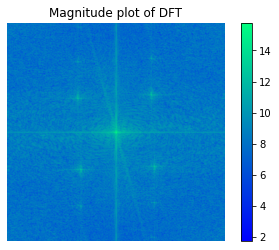

In [358]:
im = plt.imshow(np.log(I_DFT_mag), cmap='winter')
plt.title('Magnitude plot of DFT')
plt.colorbar(im)
plt.axis('off')
plt.show()

Notch reject filter with n = 4 and $D_{0}$ = 20. The four impulses are taken to be at (85,170), (85, 85), (85, -85)  and (85, -170)

In [359]:
# Notch Reject Butterworth filter
x_axis = np.linspace(-256,255,512)
y_axis = np.linspace(-256,255,512)
[u,v] = np.meshgrid(x_axis,y_axis)

H_NRBF = np.ones_like(u)

n = 4
D_0 = 20

U = np.array([1,1,1,1])*85
V = np.array([170,85,-85,-170])
impulse_loc = np.stack((U,V))

Creating the BNRF.

In [360]:
for i in range(H_NRBF.shape[0]):
    for j in range(H_NRBF.shape[1]):
        p = np.array([[u[i,j]],[v[i,j]]])
        d1 = np.linalg.norm(impulse_loc-p, axis=0) + 1e-9
        d2 = np.linalg.norm(impulse_loc+p, axis=0) + 1e-9
        f1 = 1/(1+pow(D_0/d1,2*n))
        f2 = 1/(1+pow(D_0/d2,2*n))
        H_NRBF[i][j] = np.prod(f1*f2)

BNRF in the frequency domain

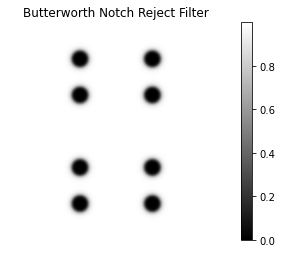

In [361]:
im  = plt.imshow(H_NRBF, cmap='gray')
plt.colorbar(im)
plt.title('Butterworth Notch Reject Filter')
plt.axis('off')
plt.show()

Filtering the given image with the constructed filter in the frequency domain

In [362]:
I_filered = I_DFT* H_NRBF
I_filered_mag = np.abs(I_filered)

Obtaining the filter image by taking the inverse fourirer transform

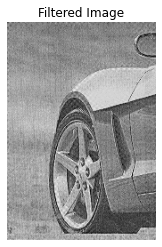

In [363]:
I_final = np.abs(np.fft.ifft2(I_filered))
I_final_crop = I_final[pad_x+1:pad_x+246, pad_y+1:pad_y+168]
plt.imshow(I_final_crop, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')
plt.show()

Readin the original image Street.png

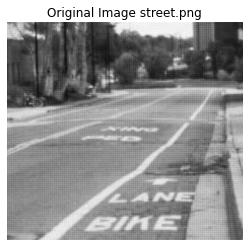

In [364]:
I = cv2.imread('Street.png',0)

plt.imshow(I, cmap='gray')
plt.title('Original Image street.png')
plt.axis('off')
plt.show()

Padding the image

In [365]:
pad_x = int((512-I.shape[0])/2)
pad_y = int((512-I.shape[1])/2)
I_pad = np.pad(I, ((pad_x, pad_x),(pad_y, pad_y+1)), constant_values = (0))

Magnitude plot of the DFT of the image shifted to the center

In [366]:
I_DFT = np.fft.fftshift(np.fft.fft2(I_pad))
I_DFT_mag = np.abs(I_DFT)

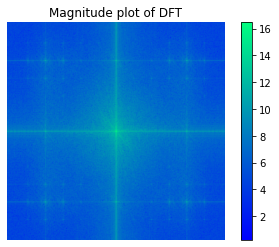

In [367]:
im = plt.imshow(np.log(I_DFT_mag), cmap='winter')
plt.colorbar(im)
plt.axis('off')
plt.title('Magnitude plot of DFT')
plt.show()

Notch reject filter with n = 5 and $D_{0}$ = 10. The four impulses are taken to be at (0,200) and (170,0)

In [368]:
# Notch Reject Butterworth filter
x_axis = np.linspace(-256,255,512)
y_axis = np.linspace(-256,255,512)
[u,v] = np.meshgrid(x_axis,y_axis)

H_NRBF = np.ones_like(u)

n = 5
D_0 = 10

U = np.array([0,1])*170
V = np.array([1,0])*200
impulse_loc = np.stack((U,V))

Constructing the Butterworth notch reject filter in the frequency domain

In [369]:
for i in range(H_NRBF.shape[0]):
    for j in range(H_NRBF.shape[1]):
        p = np.array([[u[i,j]],[v[i,j]]])
        d1 = np.linalg.norm(impulse_loc-p, axis=0) + 1e-9
        d2 = np.linalg.norm(impulse_loc+p, axis=0) + 1e-9
        f1 = 1/(1+pow(D_0/d1,2*n))
        f2 = 1/(1+pow(D_0/d2,2*n))
        H_NRBF[i][j] = np.prod(f1*f2)

Filter plotted in the frequency domain

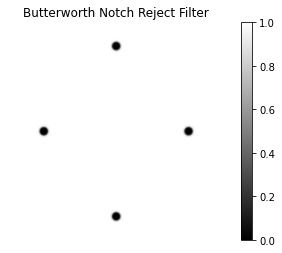

In [370]:
im  = plt.imshow(H_NRBF, cmap='gray')
plt.colorbar(im)
plt.axis('off')
plt.title('Butterworth Notch Reject Filter')
plt.show()

Filtering the given image with the constructed filter in the frequency domain

In [371]:
I_filered = I_DFT* H_NRBF
I_filered_mag = np.abs(I_filered)

Obtaining the filter image by taking the inverse fourirer transform

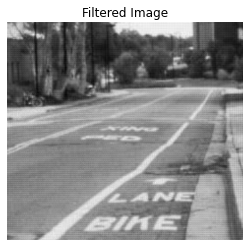

In [372]:
I_final = np.abs(np.fft.ifft2(I_filered))
I_final_crop = I_final[pad_x+1:pad_x+I.shape[0], pad_y+1:pad_y+I.shape[1]]
plt.imshow(I_final_crop, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')
plt.show()